In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary

import os
# remove local directory if it already exists
if os.path.isdir("ERA-V1-S7"):
    !rm -rf 'ERA-V1-S7'

!git clone https://github.com/pathToAIbyK/ERA-V1-S7.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ERA-V1-S7'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 74 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), 181.10 KiB | 4.89 MiB/s, done.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#import a python module from inside the library
import sys
sys.path.insert(1,f'/content/ERA-V1-S7')


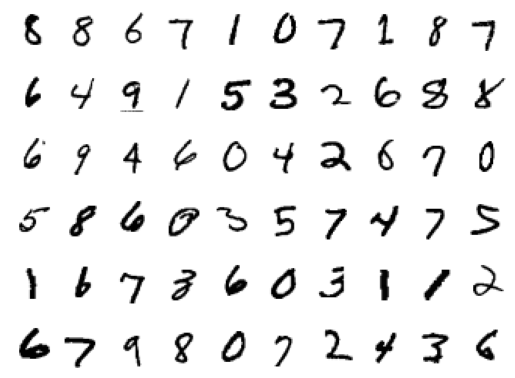

In [6]:
from utils import return_dataset_images

return_dataset_images(train_loader,60)

In [7]:
from model import Net_2,model_train,model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_2().to(device)
Net_2.model_summary(model,(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
            Conv2d-2           [-1, 16, 28, 28]           1,168
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4            [-1, 8, 14, 14]           1,160
            Conv2d-5            [-1, 8, 14, 14]             584
         MaxPool2d-6              [-1, 8, 7, 7]               0
            Conv2d-7             [-1, 16, 5, 5]           1,168
            Conv2d-8              [-1, 8, 3, 3]           1,160
            Conv2d-9             [-1, 10, 1, 1]             730
Total params: 6,050
Trainable params: 6,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.20
Params size (MB): 0.02
Estimated Total Size (MB): 0.22
------------------------------------------

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 0


Loss=0.3032277524471283 Batch_id=468 Accuracy=48.59: 100%|██████████| 469/469 [00:19<00:00, 24.38it/s]



Test set: Average loss: 0.1934, Accuracy: 9402/10000 (94.02%)

EPOCH: 1


Loss=0.07132464647293091 Batch_id=468 Accuracy=95.22: 100%|██████████| 469/469 [00:16<00:00, 28.09it/s]



Test set: Average loss: 0.0974, Accuracy: 9690/10000 (96.90%)

EPOCH: 2


Loss=0.1537024825811386 Batch_id=468 Accuracy=96.86: 100%|██████████| 469/469 [00:16<00:00, 28.81it/s]



Test set: Average loss: 0.0787, Accuracy: 9731/10000 (97.31%)

EPOCH: 3


Loss=0.04485654458403587 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:17<00:00, 26.79it/s]



Test set: Average loss: 0.0567, Accuracy: 9805/10000 (98.05%)

EPOCH: 4


Loss=0.02312532253563404 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:19<00:00, 24.04it/s]



Test set: Average loss: 0.0562, Accuracy: 9817/10000 (98.17%)

EPOCH: 5


Loss=0.018874172121286392 Batch_id=468 Accuracy=98.16: 100%|██████████| 469/469 [00:17<00:00, 27.53it/s]



Test set: Average loss: 0.0596, Accuracy: 9798/10000 (97.98%)

EPOCH: 6


Loss=0.01671292819082737 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:16<00:00, 28.22it/s]



Test set: Average loss: 0.0546, Accuracy: 9807/10000 (98.07%)

EPOCH: 7


Loss=0.02772846631705761 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:17<00:00, 26.36it/s]



Test set: Average loss: 0.0524, Accuracy: 9828/10000 (98.28%)

EPOCH: 8


Loss=0.032532524317502975 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:16<00:00, 27.90it/s]



Test set: Average loss: 0.0405, Accuracy: 9856/10000 (98.56%)

EPOCH: 9


Loss=0.018317705020308495 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:17<00:00, 26.31it/s]



Test set: Average loss: 0.0409, Accuracy: 9873/10000 (98.73%)

EPOCH: 10


Loss=0.05445483699440956 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:16<00:00, 28.09it/s]



Test set: Average loss: 0.0425, Accuracy: 9855/10000 (98.55%)

EPOCH: 11


Loss=0.04319879040122032 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:17<00:00, 27.00it/s]



Test set: Average loss: 0.0324, Accuracy: 9897/10000 (98.97%)

EPOCH: 12


Loss=0.025341877713799477 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:18<00:00, 25.56it/s]



Test set: Average loss: 0.0358, Accuracy: 9887/10000 (98.87%)

EPOCH: 13


Loss=0.01282705832272768 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:16<00:00, 28.21it/s]



Test set: Average loss: 0.0330, Accuracy: 9904/10000 (99.04%)

EPOCH: 14


Loss=0.0009066261700354517 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:16<00:00, 28.12it/s]



Test set: Average loss: 0.0341, Accuracy: 9896/10000 (98.96%)



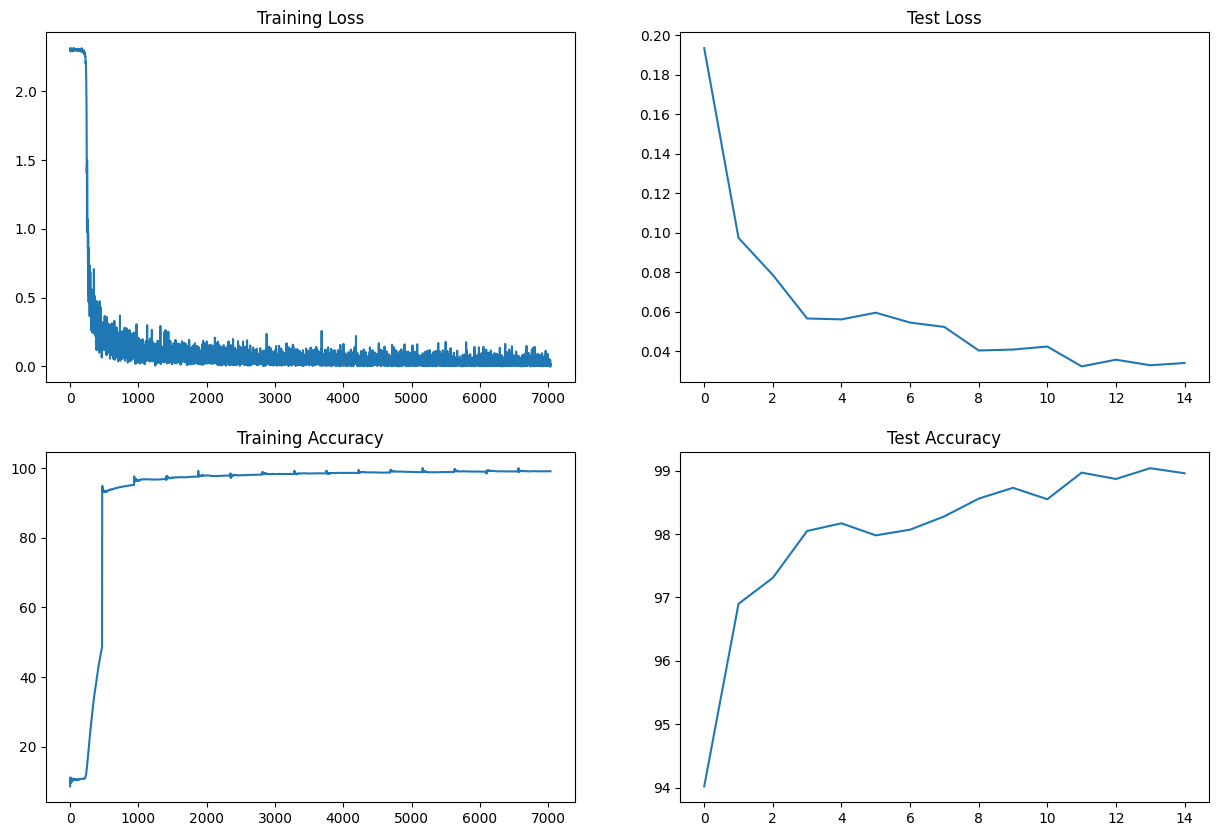

In [9]:
from model import draw_graph

draw_graph()